<a href="https://colab.research.google.com/github/vmatam7/hds5210/blob/main/week13/week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [51]:
# Load the dataset
import pandas as pd
# Load the dataset
import pandas as pd

# Define the file path
file_path = 'insurance.csv'

# Load the data
insurance_data = pd.read_csv(file_path)

# Get the number of rows and columns
num_rows = insurance_data.shape[0]  # Number of rows
num_columns = insurance_data.shape[1]  # Number of columns

# Display the results
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")
insurance_data = pd.read_csv(file_path)

# Get the number of rows and columns
num_rows = insurance_data.shape[0]  # Number of rows
num_columns = insurance_data.shape[1]  # Number of columns

# Display the results
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")


The dataset contains 1337 rows and 9 columns.
The dataset contains 1337 rows and 9 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [52]:
# Count the number of unique values in each column
unique_values_count = insurance_data.nunique()

# Display the number of unique values for each column
print("Number of unique values in each column:")
print(unique_values_count)

# Find the column with the maximum number of unique values
most_diverse_column = unique_values_count.idxmax()
most_diverse_value = unique_values_count.max()

print(f"\nThe column with the most unique values is '{most_diverse_column}' with {most_diverse_value} unique values.")

# If the dataset has a unique identifier, find the second most diverse column
# Here, we'll check if the most diverse column is likely a unique identifier.
if unique_values_count[most_diverse_column] == len(insurance_data):
    second_most_diverse_column = unique_values_count.drop(most_diverse_column).idxmax()
    second_most_diverse_value = unique_values_count.drop(most_diverse_column).max()
    print(f"The second most diverse column is '{second_most_diverse_column}' with {second_most_diverse_value} unique values.")


Number of unique values in each column:
patient_age          47
patient_sex           2
body_mass_index     548
dependent_count       6
smoking_status        2
patient_region        4
total_charges      1337
charge_per_bmi     1337
is_outlier            2
dtype: int64

The column with the most unique values is 'total_charges' with 1337 unique values.
The second most diverse column is 'charge_per_bmi' with 1337 unique values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [53]:
# Identify redundant columns (columns with the same value for all rows)
redundant_columns = [col for col in insurance_data.columns if insurance_data[col].nunique() == 1]

if redundant_columns:
    print("The following columns have the same value for every row (redundant):")
    print(redundant_columns)
else:
    print("No redundant columns found.")


No redundant columns found.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

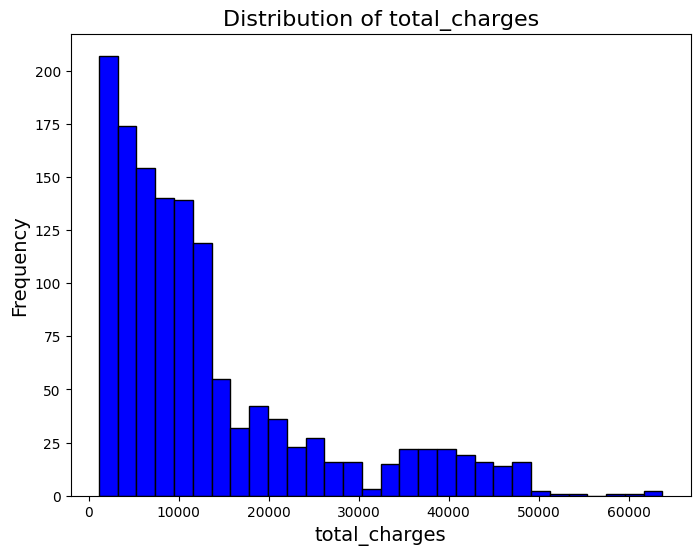

In [54]:
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_columns = insurance_data.select_dtypes(include=['float64', 'int64']).columns

# Choose a numeric column (e.g., total_charges)
column_of_interest = 'total_charges'

# Create the histogram
plt.figure(figsize=(8, 6))
insurance_data[column_of_interest].hist(bins=30, color='blue', edgecolor='black')
plt.title(f'Distribution of {column_of_interest}', fontsize=16)
plt.xlabel(column_of_interest, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

<ipython-input-55-4b58779d3c63>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_charges_by_smoking.index, y=avg_charges_by_smoking.values, palette='viridis')


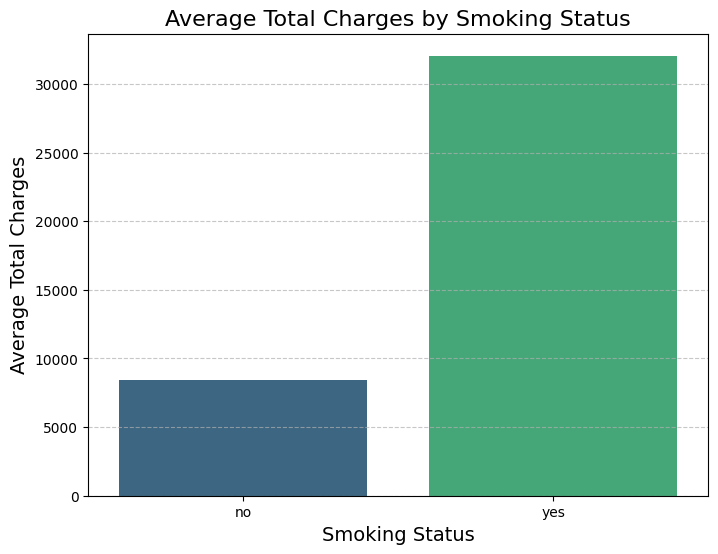

Average Total Charges by Smoking Status:
smoking_status
no      8440.660307
yes    32050.231832
Name: total_charges, dtype: float64


In [55]:
import seaborn as sns

# Group by smoking status and calculate average total charges
avg_charges_by_smoking = insurance_data.groupby('smoking_status')['total_charges'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_charges_by_smoking.index, y=avg_charges_by_smoking.values, palette='viridis')
plt.title('Average Total Charges by Smoking Status', fontsize=16)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Average Total Charges', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the exact values
print("Average Total Charges by Smoking Status:")
print(avg_charges_by_smoking)




---



## Submitting Your Work

Submit your work as usual.